<a href="https://colab.research.google.com/github/Koliadenko/Fraud-Detection/blob/main/CPDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import most of needed libs (it's actually better to import it the first time when you use it)
import numpy as np
import pandas as pd
np.random.seed(12345)
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
# import  some stuff from datetime and create a custom function
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [ ]:
# Array creating

start_date = date(2020, 1 , 23)
end_date = date(2021, 1, 23)

num_of_days = int((end_date - start_date).days) + 1

day = []

for single_date in daterange(start_date, end_date):
    day.append(single_date.strftime("%m-%d-%Y"))

In [ ]:
day

['01-23-2020',
 '01-24-2020',
 '01-25-2020',
 '01-26-2020',
 '01-27-2020',
 '01-28-2020',
 '01-29-2020',
 '01-30-2020',
 '01-31-2020',
 '02-01-2020',
 '02-02-2020',
 '02-03-2020',
 '02-04-2020',
 '02-05-2020',
 '02-06-2020',
 '02-07-2020',
 '02-08-2020',
 '02-09-2020',
 '02-10-2020',
 '02-11-2020',
 '02-12-2020',
 '02-13-2020',
 '02-14-2020',
 '02-15-2020',
 '02-16-2020',
 '02-17-2020',
 '02-18-2020',
 '02-19-2020',
 '02-20-2020',
 '02-21-2020',
 '02-22-2020',
 '02-23-2020',
 '02-24-2020',
 '02-25-2020',
 '02-26-2020',
 '02-27-2020',
 '02-28-2020',
 '02-29-2020',
 '03-01-2020',
 '03-02-2020',
 '03-03-2020',
 '03-04-2020',
 '03-05-2020',
 '03-06-2020',
 '03-07-2020',
 '03-08-2020',
 '03-09-2020',
 '03-10-2020',
 '03-11-2020',
 '03-12-2020',
 '03-13-2020',
 '03-14-2020',
 '03-15-2020',
 '03-16-2020',
 '03-17-2020',
 '03-18-2020',
 '03-19-2020',
 '03-20-2020',
 '03-21-2020',
 '03-22-2020',
 '03-23-2020',
 '03-24-2020',
 '03-25-2020',
 '03-26-2020',
 '03-27-2020',
 '03-28-2020',
 '03-29-20

In [ ]:
# The key part. Loading of the data
df_all = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv', error_bad_lines=False)
df_all['Date'] = '2020-01-22'

for i in day:
    
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+i+'.csv'
    df = pd.read_csv(url, error_bad_lines=False)

    df['Date'] = i[6:10]+'-'+i[0:2]+'-'+i[3:5]

    df_all = pd.concat([df_all,df])

In [ ]:
# reorder an the array of dates in order for it to be consistent with the standart format // to use it as dates later
from datetime import datetime

day = [datetime.strptime(i,"%m-%d-%Y").strftime('%Y-%m-%d') for i in day]
#day

In [ ]:
df_all

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,NaN,NaN,NaN,1548.0,35.0,1411.0,2021-01-22,NaN,NaN,NaN,NaN,NaN,Vietnam,2021-01-23 05:22:03,14.058324,108.277199,102.0,Vietnam,NaN,NaN,1.590325,2.26098
3975,NaN,NaN,NaN,154557.0,1769.0,143611.0,2021-01-22,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,2021-01-23 05:22:03,31.952200,35.233200,9177.0,West Bank and Gaza,NaN,NaN,3029.688228,1.14456
3976,NaN,NaN,NaN,2118.0,614.0,1423.0,2021-01-22,NaN,NaN,NaN,NaN,NaN,Yemen,2021-01-23 05:22:03,15.552727,48.516388,81.0,Yemen,NaN,NaN,7.101195,28.9896
3977,NaN,NaN,NaN,43333.0,610.0,32667.0,2021-01-22,NaN,NaN,NaN,NaN,NaN,Zambia,2021-01-23 05:22:03,-13.133897,27.849332,10056.0,Zambia,NaN,NaN,235.710964,1.4077


In [ ]:
# define studied regions
#rus_regions = ['Magadan Oblast','Mari El Republic','Mordovia Republic','Moscow']
rus_regions = ['Moscow Oblast','Saint Petersburg','Mordovia Republic','Moscow']

#eur_regions = ['Bayern','Lombardia','Sicilia','Uppsala']
eur_regions = ['Bayern','Lombardia','Sicilia','Paris']


In [ ]:
# pick the data for studied regions
df_russia = df_all[df_all['Province_State'].isin(rus_regions)]
df_europe = df_all[df_all['Province_State'].isin(eur_regions)]

In [ ]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df_europe)
df_europe

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio,Incident_Rate,Case_Fatality_Ratio
2980,NaN,NaN,NaN,45352.0,2250.0,39140.0,2020-05-14,NaN,NaN,NaN,NaN,Bayern,Germany,2020-05-15 02:33:02,48.790400,11.497900,3962.0,"Bayern, Germany",NaN,NaN,NaN,NaN
3041,NaN,NaN,NaN,83820.0,15296.0,38568.0,2020-05-14,NaN,NaN,NaN,NaN,Lombardia,Italy,2020-05-15 02:33:02,45.466794,9.190347,29956.0,"Lombardia, Italy",NaN,NaN,NaN,NaN
3093,NaN,NaN,NaN,3366.0,263.0,1249.0,2020-05-14,NaN,NaN,NaN,NaN,Sicilia,Italy,2020-05-15 02:33:02,38.115697,13.362357,1854.0,"Sicilia, Italy",NaN,NaN,NaN,NaN
2986,NaN,NaN,NaN,45532.0,2277.0,39510.0,2020-05-15,NaN,NaN,NaN,NaN,Bayern,Germany,2020-05-16 02:32:19,48.790400,11.497900,3745.0,"Bayern, Germany",NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,84119.0,15411.0,40962.0,2020-05-15,NaN,NaN,NaN,NaN,Lombardia,Italy,2020-05-16 02:32:19,45.466794,9.190347,27746.0,"Lombardia, Italy",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,520395.0,26460.0,440880.0,2021-01-21,NaN,NaN,NaN,NaN,Lombardia,Italy,2021-01-22 05:22:10,45.466794,9.190347,53055.0,"Lombardia, Italy",NaN,NaN,5172.617387,5.0846
306,NaN,NaN,NaN,126364.0,3129.0,76337.0,2021-01-21,NaN,NaN,NaN,NaN,Sicilia,Italy,2021-01-22 05:22:10,38.115697,13.362357,46898.0,"Sicilia, Italy",NaN,NaN,2527.335096,2.47618
220,NaN,NaN,NaN,387863.0,9583.0,335561.0,2021-01-22,NaN,NaN,NaN,NaN,Bayern,Germany,2021-01-23 05:22:03,48.790400,11.497900,42719.0,"Bayern, Germany",NaN,NaN,2966.057011,2.47072
298,NaN,NaN,NaN,522364.0,26518.0,442631.0,2021-01-22,NaN,NaN,NaN,NaN,Lombardia,Italy,2021-01-23 05:22:03,45.466794,9.190347,53215.0,"Lombardia, Italy",NaN,NaN,5192.188835,5.07654


In [ ]:
# reshape the data in order to get 'new cases' from 'Confirmed cases'

#Russia from 06/01
result_russia = pd.DataFrame(day)

for k in rus_regions:

    df_reg = df_russia[df_russia['Province_State'] == k]
    df_reg['Confirmed_Shifted'] = df_reg['Confirmed'].shift(1)
    df_reg = df_reg[['Date','Confirmed', 'Confirmed_Shifted']]
    df_reg[k] = df_reg['Confirmed'] - df_reg['Confirmed_Shifted']
    
    result_russia = result_russia.merge(df_reg, left_on=0, right_on='Date', how='left')
    
#result_russia[[0,'Magadan Oblast','Mari El Republic','Mordovia Republic','Moscow']].fillna(0)
result_russia = result_russia[[0]+rus_regions].fillna(0)

#Europe from 05/15
result_europe = pd.DataFrame(day)

for k in eur_regions:

    df_reg = df_europe[df_europe['Province_State'] == k]
    df_reg['Confirmed_Shifted'] = df_reg['Confirmed'].shift(1)
    df_reg = df_reg[['Date','Confirmed', 'Confirmed_Shifted']]
    df_reg[k] = df_reg['Confirmed'] - df_reg['Confirmed_Shifted']
    
    result_europe = result_europe.merge(df_reg, left_on=0, right_on='Date', how='left')
    
#result_europe[[0,'Bayern','Lombardia','Sicilia','Uppsala']].fillna(0)
result_europe = result_europe[[0]+eur_regions].fillna(0)

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(result_europe)
result_europe


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,Bayern,Lombardia,Sicilia,Paris
0,2020-01-23,0.0,0.0,0.0,0.0
1,2020-01-24,0.0,0.0,0.0,0.0
2,2020-01-25,0.0,0.0,0.0,0.0
3,2020-01-26,0.0,0.0,0.0,0.0
4,2020-01-27,0.0,0.0,0.0,0.0
...,...,...,...,...,...
361,2021-01-18,1360.0,1189.0,1278.0,0.0
362,2021-01-19,3798.0,930.0,1641.0,0.0
363,2021-01-20,2812.0,1876.0,1486.0,0.0
364,2021-01-21,2677.0,2234.0,1230.0,0.0


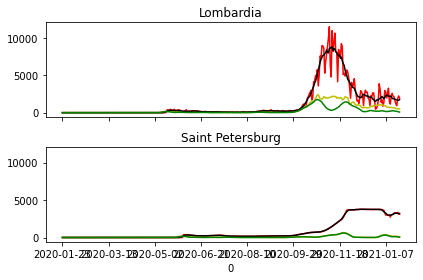

In [ ]:
# make copies, set indices to dates
temp_result_europe = result_europe.copy()
temp_result_europe.set_index(0, inplace=True)


temp_result_russia = result_russia.copy()
temp_result_russia.set_index(0, inplace=True)


fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)


ts = temp_result_europe[eur_regions[1]]

axes[0].set_title(eur_regions[1])
ts.plot(ax=axes[0], style='r')
ts.rolling(window=14, min_periods=1, center=True).std().plot(ax=axes[0], style='y')

ts2 = temp_result_russia[rus_regions[1]]

axes[1].set_title(rus_regions[1])
ts2.plot(ax=axes[1], style='r')
ts2.rolling(window=14, min_periods=1, center=True).std().plot(ax=axes[1], style='y')


# average data on a weekly basis
for reg in eur_regions:
    temp_result_europe[reg] = temp_result_europe[reg].rolling(window=7, min_periods=1, center=True).mean()

for reg in rus_regions:
    temp_result_russia[reg] = temp_result_russia[reg].rolling(window=7, min_periods=1, center=True).mean()

#plot the time series
#ts.plot(style='k--')
#ax = ts3.plot(style= 'black')

# calculate a 7 day unbiased rolling mean and plot

#ax = ts.rolling(window=7, min_periods=1, center=True).mean().plot(style='r-')
#ax = ts3.rolling(window=7, min_periods=1, center=True).mean().plot(style='b-')
#ts = ts.rolling(window=7, min_periods=1, center=True).mean()
#ts.plot(style='b')
ts.plot(ax=axes[0], style='k')
ts2.plot(ax=axes[1], style='k')


# rolling sample mean on original and smoothed data
ts.rolling(window=14, min_periods=1, center=True).std().plot(ax=axes[0], style='g')
ts2.rolling(window=14, min_periods=1, center=True).std().plot(ax=axes[1], style='g')

fig.tight_layout()
#print(ts.index[100:])


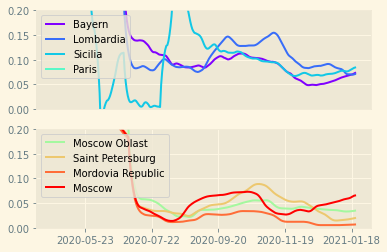

In [ ]:
import matplotlib.dates as mdates

colors = iter(matplotlib.cm.rainbow(np.linspace(0, 1, len(eur_regions+rus_regions))))

with plt.style.context('Solarize_Light2'):

    fig, (ax1, ax2) = plt.subplots(2)
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
    #plt.xlim(day[100], day[300])
    #plt.ylim(0, 0.2)
    ax1.set_ylim([0, 0.2])
    ax2.set_ylim([0, 0.2])
    ax1.get_xaxis().set_visible(False)
    #plt.plot(days,y)
    #plt.gcf().autofmt_xdate()
    #plt.show()
    
    for i in eur_regions:
        std = temp_result_europe[i].rolling(window=7, min_periods=1, center=True).std()
        mean = temp_result_europe[i].rolling(window=7, min_periods=1, center=True).mean()
        #result_europe[i+' norm var'] = std / mean
        tempo = std/mean
        tempo = tempo.rolling(window=70, min_periods=1, center=True).mean()
        ax1.plot(tempo, color=next(colors), label=i); ax1.legend(loc='best')

    for i in rus_regions:
        std = temp_result_russia[i].rolling(window=7, min_periods=1, center=True).std()
        mean = temp_result_russia[i].rolling(window=7, min_periods=1, center=True).mean()
        #result_europe[i+' norm var'] = std / mean
        tempo2 = std/mean
        tempo2 = tempo2.rolling(window=70, min_periods=1, center=True).mean()
        ax2.plot(tempo2, color=next(colors), label=i); ax2.legend(loc='best')
        







In [ ]:
pip install benford_law

In [ ]:
from benford_law import Benford

benford = Benford()

X = [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 10, 2, 3]

benford.load_dataset(X)

benford.benford_analysis()

benford.plot()


ValueError: ignored

In [ ]:
ger_regions = list(df_all[df_all['Country_Region'] == 'Germany']['Province_State'].unique())
cleanedList = [x for x in countries if str(x) != 'nan']
try:
    ger_regions.remove('NaN')
except:
    pass
try:
    ger_regions.remove('Unknown')
except:
    pass
df_german = df_all[df_all['Province_State'].isin(ger_regions)]
result_german = pd.DataFrame(day)
print(ger_regions)

for k in ger_regions:

    df_reg = df_german[df_german['Province_State'] == k]
    df_reg['Confirmed_Shifted'] = df_reg['Confirmed'].shift(1)
    df_reg = df_reg[['Date','Confirmed', 'Confirmed_Shifted']]
    df_reg[k] = df_reg['Confirmed'] - df_reg['Confirmed_Shifted']
    
    result_german = result_german.merge(df_reg, left_on=0, right_on='Date', how='left')
    
result_german = result_german[[0]+ger_regions].fillna(0)


result_german

In [ ]:
pip install -U benfords-law


In [ ]:
from benfords_law import BenfordsLaw
# initialize array with random numbers that will fail Benford's Law
#data = np.random.randint(low=100, high=1000000, size=1000)
data = temp_result_europe[eur_regions[0]]
benfords = BenfordsLaw(data)
benfords.apply_benfords_law()